# Homework 1: Exploring & Visualizing Data

## Part 1: Data Exploration and Preparation

## Setup

Make sure you have seaborn and missingno installed. Run `pip3 install seaborn` and `pip3 install missingno` in your container/shell if you don't.

In this homework, we will more rigorously explore data visualization and data manipulation with a couple datasets. Please fill in the cells with `## YOUR CODE HERE` following the appropriate directions.

In [193]:
# removes the need to call plt.show() every time
%matplotlib inline

Seaborn is a powerful data visualization library built on top of matplotlib. We will be using seaborn for this homework (since it is a better tool and you should know it well). Plus seaborn comes default with *much* better aesthetics (invoked with the `set()` function call). 

Please import seaborn as sns 

In [194]:
import seaborn as sns

In [195]:
## YOUR CODE HERE
sns.set() # This sets aesthetic parameters in one step

First load the `titanic` dataset directly from seaborn. The `load_dataset` function will return a pandas dataframe. Documentation: https://seaborn.pydata.org/generated/seaborn.load_dataset.html

In [196]:
titanic = sns.load_dataset("titanic")

## Preparing a new dataset (Pandas)

Import `numpy` and `pandas` (remember to abbreviate them accordingly!)

In [197]:
import numpy as np
import pandas as pd

Now use some pandas functions to get a quick overview/statistics on the dataset. Take a quick glance at the overview you create.

In [198]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [200]:
survival_rate = titanic['survived'].value_counts()/len(titanic['survived'])

In [201]:
survival_rate

0    0.616162
1    0.383838
Name: survived, dtype: float64

With your created overview, you should be able to answer these questions:

* What was the age of the oldest person on board?  80.0
* What was the survival rate of people on board?  0.38
* What was the average fare of people on board?  32.2

By the way, for getting overviews, pandas also has a `groupby` function that is quite nice to use. example:

In [202]:
titanic.groupby(['sex','embark_town'])['survived'].mean()

sex     embark_town
female  Cherbourg      0.876712
        Queenstown     0.750000
        Southampton    0.689655
male    Cherbourg      0.305263
        Queenstown     0.073171
        Southampton    0.174603
Name: survived, dtype: float64

Now we have an overview of our dataset. The next thing we should do is clean it.

One quick observation is that there are a couple of repetitive columns. One example is the 'embarked_town' and 'embarked' columns which are conveying the same information. As we are preparing this dataset to be used in a model we only want to keep one of those columns. **Find the other repetitive pair of columns and drop the non-numerical one.**

Hint: is there a function that could helps us preview the first few items in the dataset?

<i> Note: adult_male differs from sex since there could be children males </i>

In [203]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [204]:
titanic.drop('embark_town', axis=1, inplace=True) 
titanic.drop('who', axis=1, inplace=True)
## YOUR CODE HERE
titanic.drop('class', axis=1, inplace=True)

check for missing values and deal with them appropriately. `missingno` allows us to really easily see where missing values are in our dataset. It's a simple command. <b>Import missingno as msno and use its matrix function on titanic.</b> 
https://www.residentmar.io/2016/03/28/missingno.html

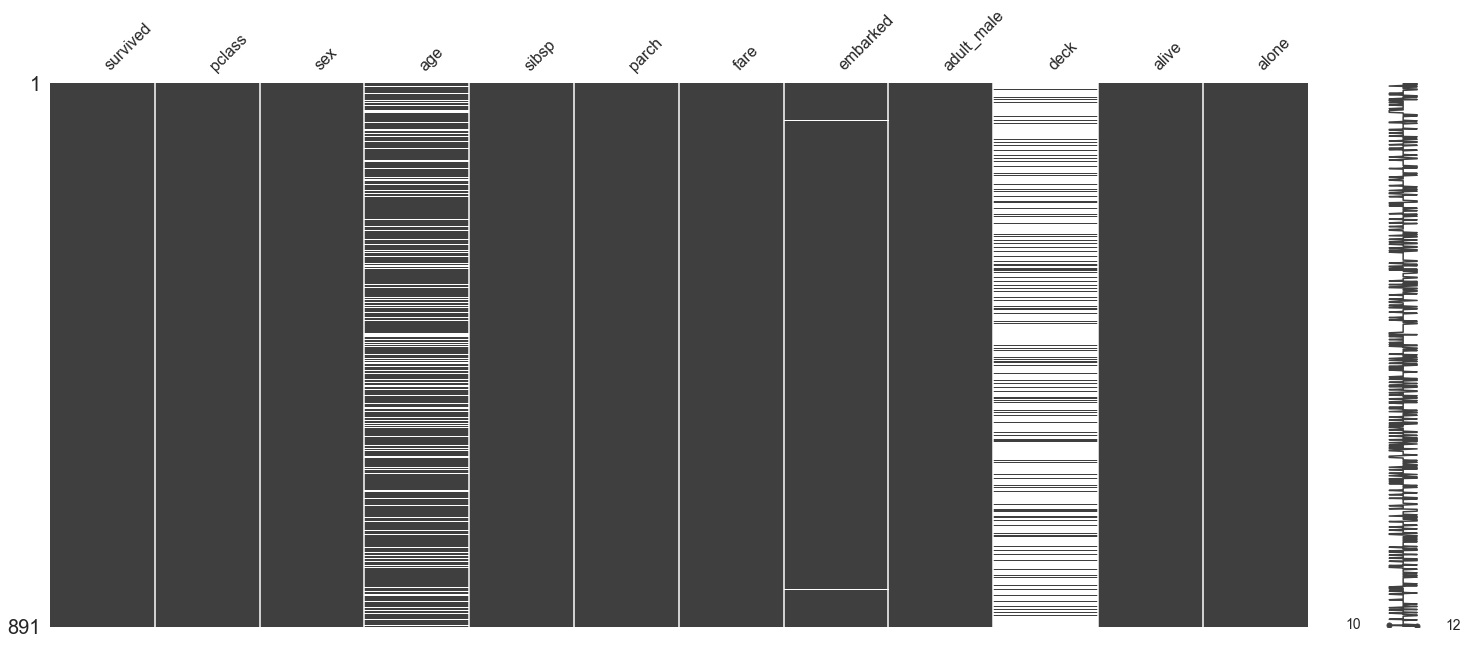

In [205]:
import missingno as msno
msno.matrix(titanic)

The white lines show us the missing data. One quick observation is the `deck` has a lot of missing data. Let's just go ahead and **drop the deck column from the dataset** since it's not that relevant. Make sure to set inplace=True.  Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html. 

In [206]:
titanic.drop('deck', axis=1, inplace=True) 

Now let's rerun the matrix and see. All that white is gone! Nice.

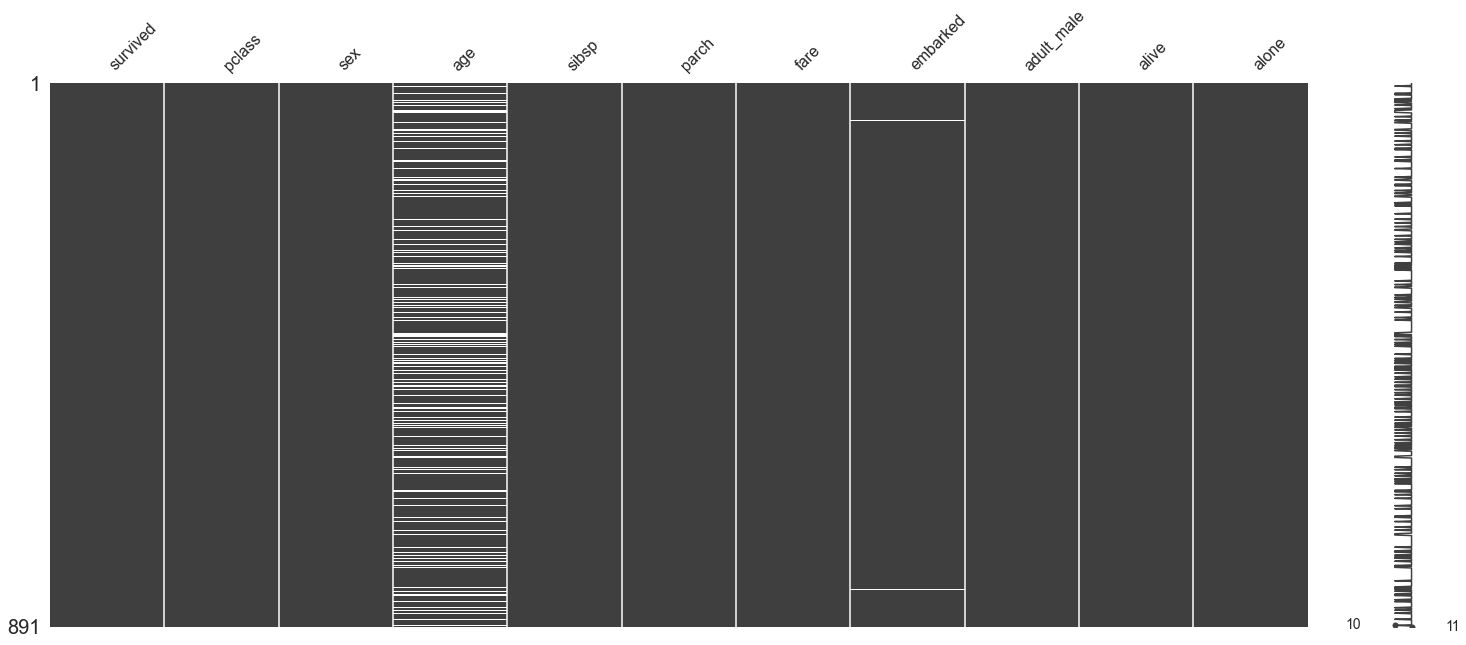

In [207]:
msno.matrix(titanic)

We still have a bunch of <b>missing values for the age field.</b> We can't just drop the age column since it is a pretty important datapoint. One way to deal with this is simply to just remove the records with missing information with `dropna()`, but this would end up removing out a significant amount of our data. 

What do we do now? We can now explore a technique called `missing value imputation`. What this means is basically we find a reasonable way to *replace* the unknown data with workable values. 

There's a lot of theory regarding how to do this properly, ([for the curious look here](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)). We can simply put in the average age value for the missing ages. But this really isn't so great, and will skew our stats.

If we assume that the data is missing *at random* (which actually is rarely the case and very hard to prove), we can just fit a model to predict the missing value based on the other available factors. One popular way to do this is to use KNN (where you look at the nearest datapoints to a certain point to conclude the missing value), but we can also use deep neural networks to achieve this task.  

You must now make you own decision on how to deal with the missing data. You may choose any of the methods discussed above. Easiest would be to fill in with average value (but this will skew our visualizations) (if you use pandas correctly, you can do this in one line - try looking at pandas documentation!). After writing your code, verify the result by rerunning the matrix - you should not see any white lines.

In [208]:
## YOUR CODE HERE
from sklearn.impute import KNNImputer
age_df = pd.DataFrame(titanic['age'])

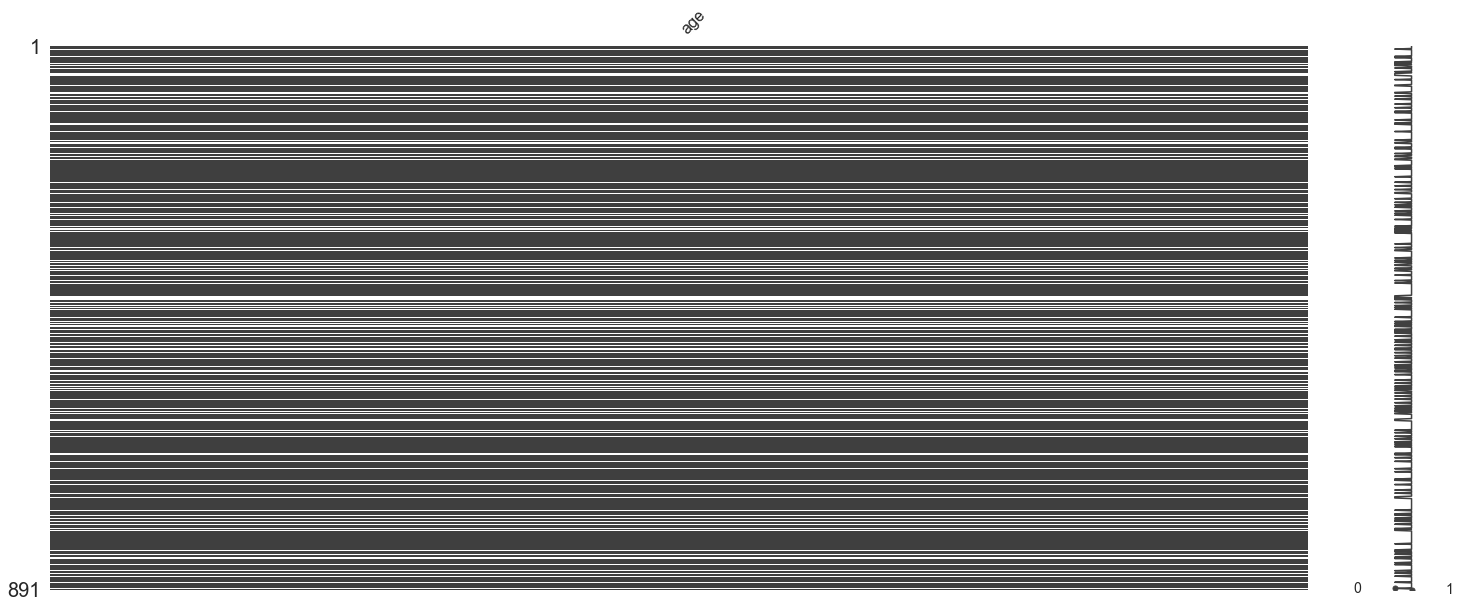

In [209]:
msno.matrix(age_df)

In [210]:
imputer = KNNImputer(n_neighbors=11)
titanic['age'] = imputer.fit_transform(titanic[['age']])

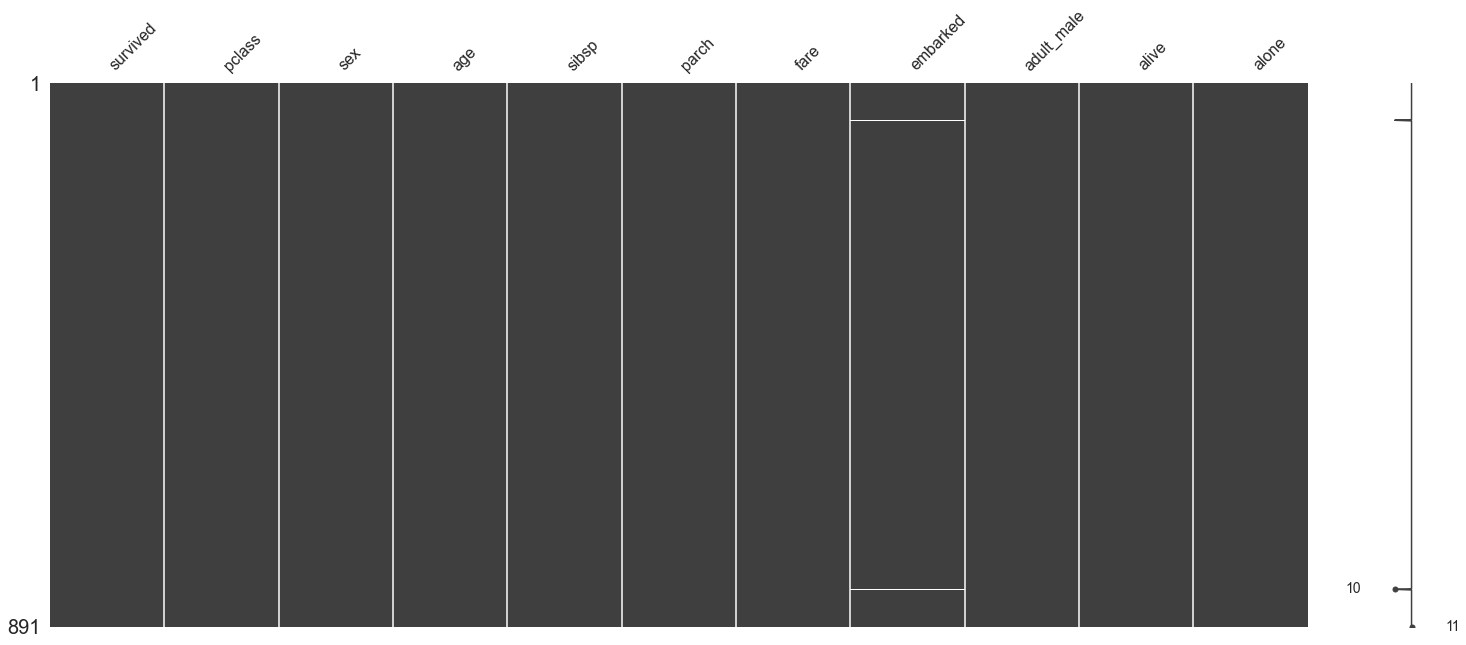

In [211]:
msno.matrix(titanic)

In [212]:
titanic.dropna(inplace=True)

If we were to feed our dataset into a model, the model cannot understand features such as 'True', 'Yes', 'male'. You have to turn the data into binary format, 1 for positive and 0 negative. ** Fill in toBinary and then use it to binarize the 'alive', 'sex', 'alone', and 'adult_male' columns. **

In [213]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,True,no,True


In [214]:
def toBinary(data, positive):
    f = lambda x:1 if x == positive else 0
    data = data.map(f)
    return data
    
titanic['alive'] = toBinary(titanic['alive'], 'yes')
titanic['sex'] = toBinary(titanic['sex'], 'male')
titanic['alone'] = toBinary(titanic['alone'], 'True')
titanic['adult_male'] = toBinary(titanic['adult_male'], 'True')

In [215]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,0,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,1,0
2,1,3,0,26.0,0,0,7.9250,S,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,1,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,0


In [216]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,0,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,1,0
2,1,3,0,26.0,0,0,7.9250,S,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,1,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,0


As we learned in lecture, we have to Normalize our numerical data points. Now you must **define the function 'Standardize' that standardizes the column passed in**, and then pass in the 'age' and 'fare' columns. 

<i> Hint: There is a `sklearn` function that can help with normalization

In [217]:
from sklearn.preprocessing import Normalizer
def Standardize(data):
    normalizer = Normalizer()
    normalizer.fit_transform(data)
    data = data.reshape((-1,1))
    return data
    
titanic['age'] =  Standardize(titanic['age'])
titanic['fare'] = Standardize(titanic['fare'])

ValueError: Expected 2D array, got 1D array instead:
array=[22.         38.         26.         35.         35.         29.69911765
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         29.69911765
 31.         29.69911765 35.         34.         15.         28.
  8.         38.         29.69911765 19.         29.69911765 29.69911765
 40.         29.69911765 29.69911765 66.         28.         42.
 29.69911765 21.         18.         14.         40.         27.
 29.69911765  3.         19.         29.69911765 29.69911765 29.69911765
 29.69911765 18.          7.         21.         49.         29.
 65.         29.69911765 21.         28.5         5.         11.
 22.         45.          4.         29.69911765 29.69911765 29.
 19.         17.         26.         32.         16.         21.
 26.         32.         25.         29.69911765 29.69911765  0.83
 30.         22.         29.         29.69911765 28.         17.
 33.         16.         29.69911765 23.         24.         29.
 20.         46.         26.         59.         29.69911765 71.
 23.         34.         34.         28.         29.69911765 21.
 33.         37.         28.         21.         29.69911765 38.
 29.69911765 47.         14.5        22.         20.         17.
 21.         70.5        29.         24.          2.         21.
 29.69911765 32.5        32.5        54.         12.         29.69911765
 24.         29.69911765 45.         33.         20.         47.
 29.         25.         23.         19.         37.         16.
 24.         29.69911765 22.         24.         19.         18.
 19.         27.          9.         36.5        42.         51.
 22.         55.5        40.5        29.69911765 51.         16.
 30.         29.69911765 29.69911765 44.         40.         26.
 17.          1.          9.         29.69911765 45.         29.69911765
 28.         61.          4.          1.         21.         56.
 18.         29.69911765 50.         30.         36.         29.69911765
 29.69911765  9.          1.          4.         29.69911765 29.69911765
 45.         40.         36.         32.         19.         19.
  3.         44.         58.         29.69911765 42.         29.69911765
 24.         28.         29.69911765 34.         45.5        18.
  2.         32.         26.         16.         40.         24.
 35.         22.         30.         29.69911765 31.         27.
 42.         32.         30.         16.         27.         51.
 29.69911765 38.         22.         19.         20.5        18.
 29.69911765 35.         29.         59.          5.         24.
 29.69911765 44.          8.         19.         33.         29.69911765
 29.69911765 29.         22.         30.         44.         25.
 24.         37.         54.         29.69911765 29.         62.
 30.         41.         29.         29.69911765 30.         35.
 50.         29.69911765  3.         52.         40.         29.69911765
 36.         16.         25.         58.         35.         29.69911765
 25.         41.         37.         29.69911765 63.         45.
 29.69911765  7.         35.         65.         28.         16.
 19.         29.69911765 33.         30.         22.         42.
 22.         26.         19.         36.         24.         24.
 29.69911765 23.5         2.         29.69911765 50.         29.69911765
 29.69911765 19.         29.69911765 29.69911765  0.92       29.69911765
 17.         30.         30.         24.         18.         26.
 28.         43.         26.         24.         54.         31.
 40.         22.         27.         30.         22.         29.69911765
 36.         61.         36.         31.         16.         29.69911765
 45.5        38.         16.         29.69911765 29.69911765 29.
 41.         45.         45.          2.         24.         28.
 25.         36.         24.         40.         29.69911765  3.
 42.         23.         29.69911765 15.         25.         29.69911765
 28.         22.         38.         29.69911765 29.69911765 40.
 29.         45.         35.         29.69911765 30.         60.
 29.69911765 29.69911765 24.         25.         18.         19.
 22.          3.         29.69911765 22.         27.         20.
 19.         42.          1.         32.         35.         29.69911765
 18.          1.         36.         29.69911765 17.         36.
 21.         28.         23.         24.         22.         31.
 46.         23.         28.         39.         26.         21.
 28.         20.         34.         51.          3.         21.
 29.69911765 29.69911765 29.69911765 33.         29.69911765 44.
 29.69911765 34.         18.         30.         10.         29.69911765
 21.         29.         28.         18.         29.69911765 28.
 19.         29.69911765 32.         28.         29.69911765 42.
 17.         50.         14.         21.         24.         64.
 31.         45.         20.         25.         28.         29.69911765
  4.         13.         34.          5.         52.         36.
 29.69911765 30.         49.         29.69911765 29.         65.
 29.69911765 50.         29.69911765 48.         34.         47.
 48.         29.69911765 38.         29.69911765 56.         29.69911765
  0.75       29.69911765 38.         33.         23.         22.
 29.69911765 34.         29.         22.          2.          9.
 29.69911765 50.         63.         25.         29.69911765 35.
 58.         30.          9.         29.69911765 21.         55.
 71.         21.         29.69911765 54.         29.69911765 25.
 24.         17.         21.         29.69911765 37.         16.
 18.         33.         29.69911765 28.         26.         29.
 29.69911765 36.         54.         24.         47.         34.
 29.69911765 36.         32.         30.         22.         29.69911765
 44.         29.69911765 40.5        50.         29.69911765 39.
 23.          2.         29.69911765 17.         29.69911765 30.
  7.         45.         30.         29.69911765 22.         36.
  9.         11.         32.         50.         64.         19.
 29.69911765 33.          8.         17.         27.         29.69911765
 22.         22.         62.         48.         29.69911765 39.
 36.         29.69911765 40.         28.         29.69911765 29.69911765
 24.         19.         29.         29.69911765 32.         62.
 53.         36.         29.69911765 16.         19.         34.
 39.         29.69911765 32.         25.         39.         54.
 36.         29.69911765 18.         47.         60.         22.
 29.69911765 35.         52.         47.         29.69911765 37.
 36.         29.69911765 49.         29.69911765 49.         24.
 29.69911765 29.69911765 44.         35.         36.         30.
 27.         22.         40.         39.         29.69911765 29.69911765
 29.69911765 35.         24.         34.         26.          4.
 26.         27.         42.         20.         21.         21.
 61.         57.         21.         26.         29.69911765 80.
 51.         32.         29.69911765  9.         28.         32.
 31.         41.         29.69911765 20.         24.          2.
 29.69911765  0.75       48.         19.         56.         29.69911765
 23.         29.69911765 18.         21.         29.69911765 18.
 24.         29.69911765 32.         23.         58.         50.
 40.         47.         36.         20.         32.         25.
 29.69911765 43.         29.69911765 40.         31.         70.
 31.         29.69911765 18.         24.5        18.         43.
 36.         29.69911765 27.         20.         14.         60.
 25.         14.         19.         18.         15.         31.
  4.         29.69911765 25.         60.         52.         44.
 29.69911765 49.         42.         18.         35.         18.
 25.         26.         39.         45.         42.         22.
 29.69911765 24.         29.69911765 48.         29.         52.
 19.         38.         27.         29.69911765 33.          6.
 17.         34.         50.         27.         20.         30.
 29.69911765 25.         25.         29.         11.         29.69911765
 23.         23.         28.5        48.         35.         29.69911765
 29.69911765 29.69911765 36.         21.         24.         31.
 70.         16.         30.         19.         31.          4.
  6.         33.         23.         48.          0.67       28.
 18.         34.         33.         29.69911765 41.         20.
 36.         16.         51.         29.69911765 30.5        29.69911765
 32.         24.         48.         57.         29.69911765 54.
 18.         29.69911765  5.         29.69911765 43.         13.
 17.         29.         29.69911765 25.         25.         18.
  8.          1.         46.         29.69911765 16.         29.69911765
 29.69911765 25.         39.         49.         31.         30.
 30.         34.         31.         11.          0.42       27.
 31.         39.         18.         39.         33.         26.
 39.         35.          6.         30.5        29.69911765 23.
 31.         43.         10.         52.         27.         38.
 27.          2.         29.69911765 29.69911765  1.         29.69911765
 15.          0.83       29.69911765 23.         18.         39.
 21.         29.69911765 32.         29.69911765 20.         16.
 30.         34.5        17.         42.         29.69911765 35.
 28.         29.69911765  4.         74.          9.         16.
 44.         18.         45.         51.         24.         29.69911765
 41.         21.         48.         29.69911765 24.         42.
 27.         31.         29.69911765  4.         26.         47.
 33.         47.         28.         15.         20.         19.
 29.69911765 56.         25.         33.         22.         28.
 25.         39.         27.         19.         29.69911765 26.
 32.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Finally we have to deal with the categorical columns that have more than two categories. For this situation we will use One-Hot encoding http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example. Pandas has a good method 'get_dummies' that makes this task much easier. Read the documentation and fill in the code to ** One-Hot encode the 'pclass' and 'embarked' columns. .concat the output from get_dummies and drop the original columns. ** 

In [218]:
pd.get_dummies(titanic["embarked"])
titanic.drop('embarked', axis=1, inplace=True)

pd.get_dummies(titanic["pclass"])
titanic.drop('pclass', axis=1, inplace=True)

In [219]:
titanic.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alive,alone
0,0,1,22.0,1,0,7.2500,0,0,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,1,0,26.0,0,0,7.9250,0,1,0
3,1,0,35.0,1,0,53.1000,0,1,0
4,0,1,35.0,0,0,8.0500,0,0,0


## Intro to Seaborn

Seaborn can handle categorical data and NaN directly, **reload the titanic dataset to its original version**

In [220]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

There are 2 types of data in any dataset: categorial and numerical data. We will first explore categorical data.

One really easy way to show categorical data is through bar plots. Let's explore how to make some in seaborn.
We want to investigate the difference in rates at which males vs females survived the accident. Using the [documentation here](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [example here](http://seaborn.pydata.org/examples/color_palettes.html), create a `barplot` to depict this. It should be a really simple one-liner.

We will show you how to do this so you can get an idea of how to use the API.

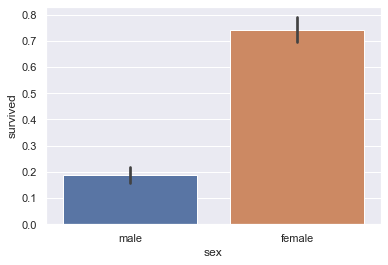

In [221]:
sns.barplot(x='sex', y='survived', data=titanic)

Notice how it was so easy to create the plot! You simply passed in the entire dataset, and just specified the `x` and `y` fields that you wanted exposed for the barplot. Behind the scenes seaborn ignored `NaN` values for you and automatically calculated the survival rate to plot. Also, that black tick is a 95% confidence interval that seaborn plots.

So we see that females were much more likely to make it out alive. What other factors do you think could have an impact on surival rate? ** Plot a couple more barplots below. ** Make sure to use *categorical* values, not something numerical like age or fare.

In [222]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


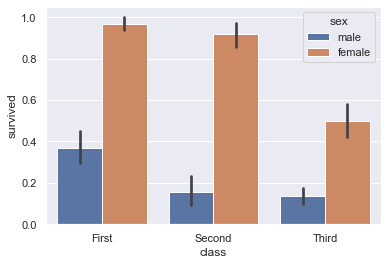

In [227]:
sns.barplot(x='class', y='survived', data=titanic, hue='sex')


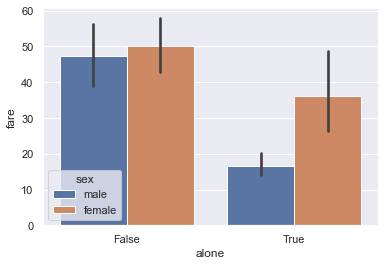

In [228]:
sns.barplot(x='alone', y='fare', data=titanic, hue='sex')


What if we wanted to add a further sex breakdown for the categories chosen above? Go back and add a `hue='sex'` parameter for the couple plots you just created, and seaborn will split each bar into a male/female comparison.

Now we want to compare the embarking town vs the age of the individuals. We don't simply want to use a barplot, since that will just give the average age; rather, we would like more insight into the relative and numeric *distribution* of ages.

A good tool to help us here is [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html). Use this function to view `embark_town` vs `age`, again using `sex` as the `hue`.

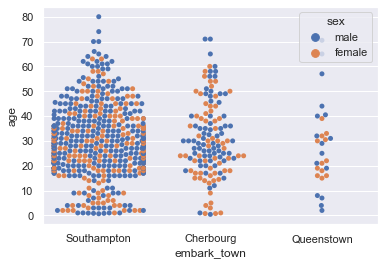

In [230]:
sns.swarmplot(x = 'embark_town', y = 'age', data = titanic, hue = 'sex')

Cool! This gives us much more information. What if we didn't care about the number of individuals in each category at all, but rather just wanted to see the *distribution* in each category? [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plots a density distribution. Plot that. Keep the `hue`.

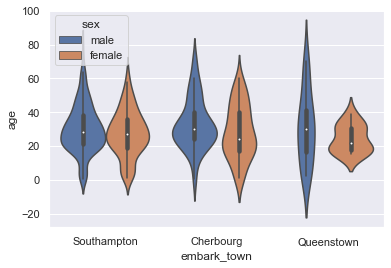

In [232]:
sns.violinplot(x = 'embark_town', y = 'age', data = titanic, hue = 'sex')

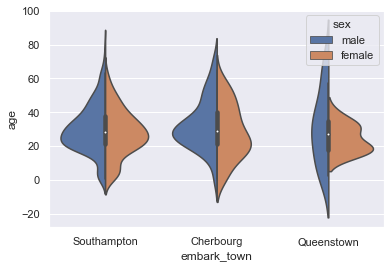

In [233]:
sns.violinplot(x = 'embark_town', y = 'age', data = titanic, split = "True", hue = 'sex')

Go back and clean up the violinplot by adding `split='True'` parameter. 

Now take a few seconds to look at the graphs you've created of this data. What are some observations? Jot a couple down here.

#### Your observations Here
----
* Ages between 20 to 30 seemed to have the highest frequency in the ship.
* The distribution for females embarking in Cherbourg was not very symmetric.
* The female distribution for those embarking in Queenstown seemed much more skewed than the corresponding male distribution.

As I mentioned, data is categorical or numeric. We already started getting into numerical data with the swarmplot and violinplot. We will now explore a couple more examples.

Let's look at the distribution of ages. Use [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html) to make a histogram of just the ages.

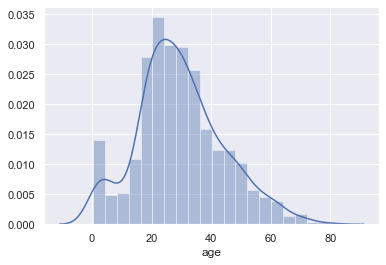

In [237]:
sns.distplot(a = titanic['age'])

If you did your missing value imputation by average value (If we had not reloaded the data set), your results will look very skewed. This is why we don't normally just fill in an average. As a quick fix for now, though, you can filter out the age values that equal the mean before passing it in to `displot`.

A histogram can nicely represent numerical data by breaking up numerical ranges into chunks so that it is easier to visualize. As you might notice from above, seaborn also automatically plots a gaussian kernel density estimate.

Do the same thing for fares - do you notice something odd about that histogram? What does that skew mean?

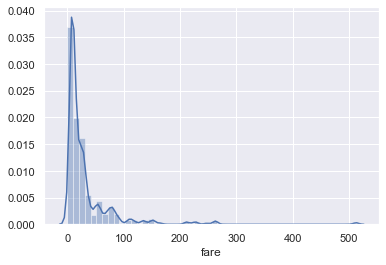

In [238]:
sns.distplot(a = titanic['fare'])

The histogram is skewed right. Skew means that the distribution leans towards either a lower or higher value for the variable. Also, skew generally refers to a distribution's tail end.

Now, using the [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) function, make a scatterplot of the `age` and `fare` variables to see if there is any relationship between the two.

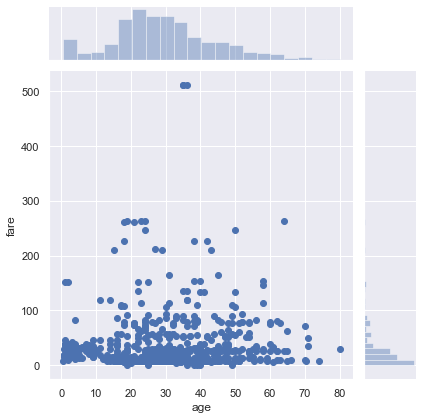

In [239]:
sns.jointplot(x='age',y='fare',data=titanic)

Scatterplots allow one to easily see trends/coorelations in data. As you can see here, there seems to be very little correlation. Also observe that seaborn automatically plots histograms.

Now, use a seaborn function we haven't used yet to plot something. The [API](http://seaborn.pydata.org/api.html) has a list of all the methods.

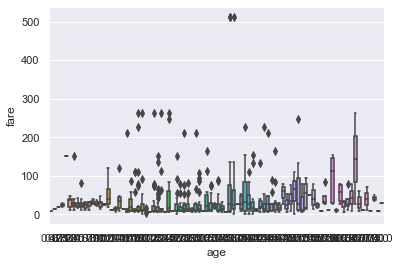

In [240]:
## YOUR CODE HERE
sns.boxplot(x='age',y='fare',data=titanic)